In [2]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='darkblue')
    plots.xlabel(x)
    plots.ylabel(y)

In [42]:
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 700)
    z = np.random.normal(0, 1, 700)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(6,6))
    plots.scatter(x, y, s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.axes().set_aspect('equal')

In [53]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

# Regression

## Part I: The regression effect

[Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton)

In [33]:
heights = Table.read_table('heights.csv')
heights

father,son
65,59.8
63.3,63.2
65,63.3
65.8,62.8
61.1,64.3
63,64.2
65.4,64.1
64.7,64
66.1,64.6
67,64


### Estimate of y, given x: Centers of vertical strips

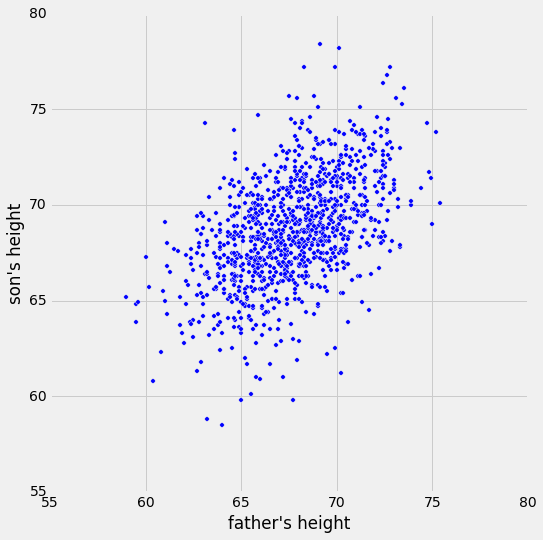

In [34]:
# Scatter plot
plots.figure(figsize=(8,8))
plots.scatter(heights.column('father'), heights.column('son'), s=20)
plots.xlabel("father's height")
plots.ylabel("son's height")
plots.axes().set_aspect('equal')

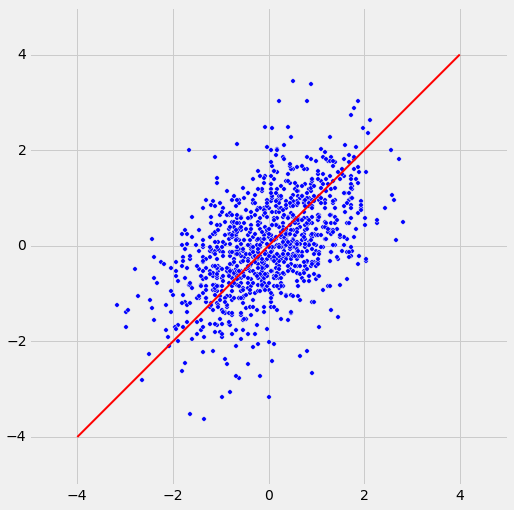

In [35]:
f_su = (heights['father']-np.mean(heights['father']))/np.std(heights['father'])
s_su = (heights['son']-np.mean(heights['son']))/np.std(heights['son'])
plots.figure(figsize=(8,8))
plots.scatter(f_su, s_su, s=20)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.axes().set_aspect('equal')

### The regression effect

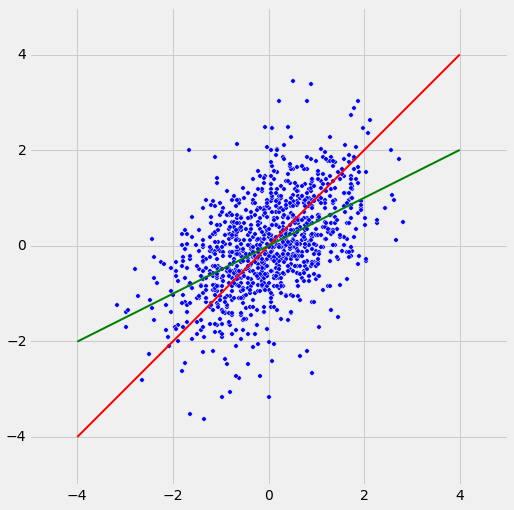

In [36]:
# The regression effect

f_su = (heights['father']-np.mean(heights['father']))/np.std(heights['father'])
s_su = (heights['son']-np.mean(heights['son']))/np.std(heights['son'])
r = correlation(heights, 'father', 'son')
plots.figure(figsize=(8,8))
plots.scatter(f_su, s_su, s=20)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([-4, 4], [-4*r, 4*r], color='g', lw=2)
plots.axes().set_aspect('equal')

[FPP cover](fpp_cover.jpg)

### The correlation coefficient

In [73]:
correlation(heights, 'father', 'son')

0.50116268080759108

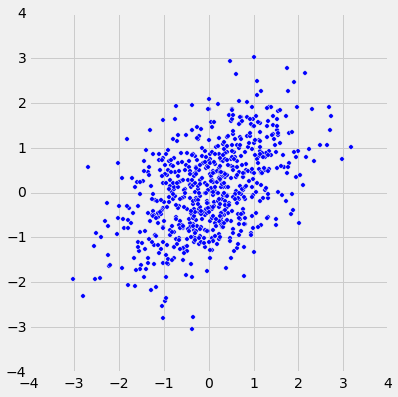

In [72]:
# Varying r
r_scatter(0.5)

## Part II: The regression line

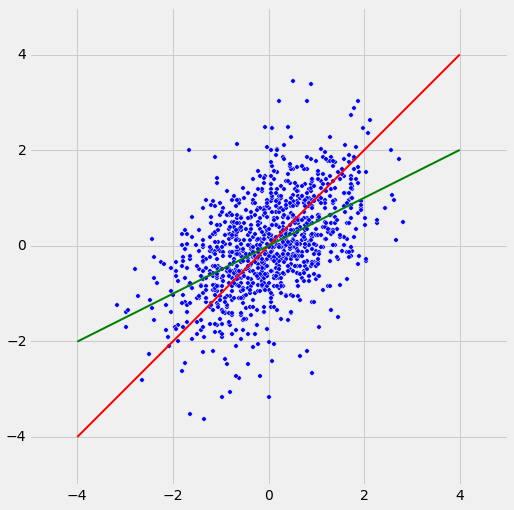

In [45]:
f_su = (heights['father']-np.mean(heights['father']))/np.std(heights['father'])
s_su = (heights['son']-np.mean(heights['son']))/np.std(heights['son'])
r = correlation(heights, 'father', 'son')
plots.figure(figsize=(8,8))
plots.scatter(f_su, s_su, s=20)
plots.plot([-4, 4], [-4, 4], color='r', lw=2)
plots.plot([-4, 4], [-4*r, 4*r], color='g', lw=2)
plots.axes().set_aspect('equal')

## Equation of regression line, all in standard units

(estimate of $y$, in standard units) = $r ~\times~$ (given $x$, in standard units)

- In standard units, the intercept of the regression line is 0 and the slope is r.
- If you want the slope and the intercept of the regression line in the original units of the data, use the functions ``slope(table, x_label, y_label)`` and ``intercept(table, x_label, y_label)``.

## The amount of error in regression

In [47]:
little_women = Table.read_table('little_women.csv')
little_women.show(3)

Characters,Periods
21759,189
22148,188
20558,231


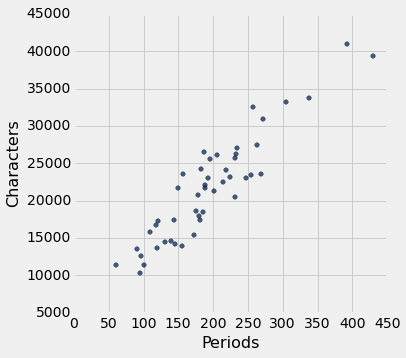

In [48]:
# One point for each chapter
# Horizontal axis: number of periods
# Vertical axis: number of characters (as in a, b, ", ?, etc; not people in the book)

little_women.scatter('Periods', 'Characters')

In [49]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

Slope:     87.0
Intercept: 4745.0


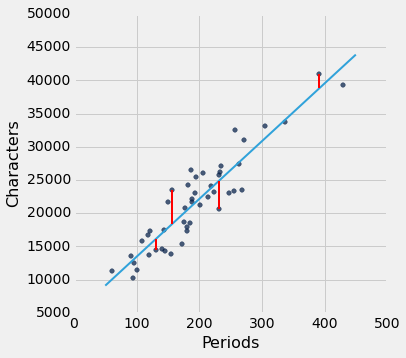

In [54]:
# Residuals: Deviations from the regression line

lw_slope = slope(little_women, 'Periods', 'Characters')
lw_intercept = intercept(little_women, 'Periods', 'Characters')
print('Slope:    ', np.round(lw_slope))
print('Intercept:', np.round(lw_intercept))
lw_errors(lw_slope, lw_intercept)

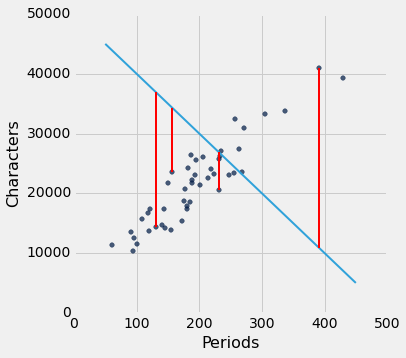

In [55]:
# Errors: Deviations from a different line

lw_errors(-100, 50000)

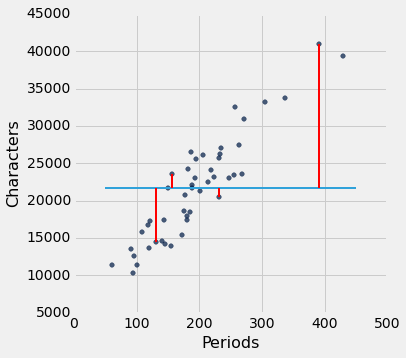

In [56]:
# Errors: Deviations from the flat line at the average of y

characters_average = np.mean(little_women.column('Characters'))
lw_errors(0, characters_average)

### Least Squares: the unique "best" line.

- To get estimates of $y$ based on $x$, you can use any line you want.
- Every line has a mean squared error of estimation.
- "Better" lines have smaller errors.
- **The regression line is the unique straight line that minimizes the mean squared error of estimation among all straight lines.**

### Numerical Optimization

We can also define `mean_squared_error` for an arbitrary data set. We'll use a higher-order function so that we can try many different lines on the same data set, simply by passing in their slope and intercept.

In [58]:
def mean_squared_error(table, x, y):
    def for_line(slope, intercept):
        fitted = (slope * table.column(x) + intercept)
        return np.meanm((table.column(y) - fitted) ** 2)
    return for_line

In [63]:
mse_lw = mean_squared_error(little_women, 'Periods', 'Characters')
a, b = minimize(mse_lw)
a, b

(86.977841166158839, 4744.7848453526549)

## Part III: Prediction

In [3]:
baby = Table.read_table('baby.csv')

In [6]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.40754279338885108

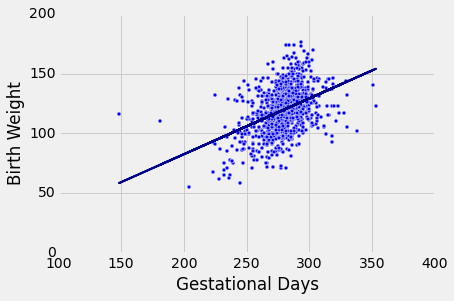

In [64]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

# The next two lines just make the plot easier to read
plots.ylim([0, 200])
None

In [69]:
fit_300 = fitted_value(baby, 'Gestational Days', 'Birth Weight', 300)
fit_300

129.2129241703143

The figure below shows where the prediction lies on the regression line. The red line is at $x = 300$.

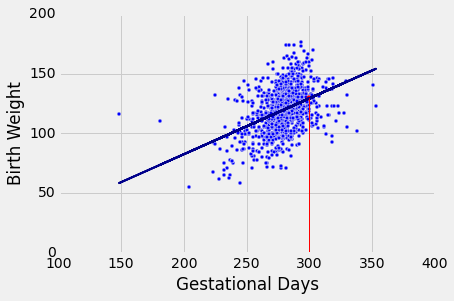

In [70]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')
plots.scatter(300, fit_300, color='red', s=20)
plots.plot([300,300], [0, fit_300], color='red', lw=1)
plots.ylim([0, 200])
None